___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
len(df)

2000

**TASK: Check to see if there are any missing values in the dataframe.**

In [5]:
missing_labels = df['label'].isnull().sum()
missing_labels

0

In [6]:
missing_values = df['review'].isnull().sum()
missing_values

35

**TASK: Remove any reviews that are NaN**

In [36]:
df_new = df.dropna()
df_new.isnull().sum()

# nebo
#df_new = df.drop(df[df['review'].isnull()].index)
#df_new

label 0
review 0
dtype: int64

In [37]:
len(df_new)

1965

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [43]:
df_new_dropped = df_new[~df_new['review'].str.isspace()]
df_new_dropped

# ~ is used to inverse what is coded. In this case create a df from all that is not isspace

# or
# empty_string_reviews = df_new[df_new['review'].apply(lambda x: str(x).isspace())]
# df_new_dropped = df_new.drop(empty_string_reviews.index)


,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [42]:
len(df_new_dropped)

1938

**TASK: Confirm the value counts per label:**

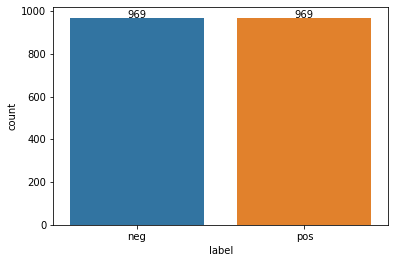

In [51]:
ax = sns.countplot(x='label', data=df_new_dropped)

fig = plt.gcf()

# loop to print the number of datapoints in each bar
for p in ax.patches:
    height = p.get_height()  # get the height of each bar
    # add text to each bar using ax.text
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.0f}'.format(height), 
            ha = 'center') 


## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [70]:

from sklearn.feature_extraction.text import CountVectorizer

custom_stop_words = ['film', 'movie', 'character', 'films', 'movies', 'does', 'really', 'actor', 'actors', 'actress', 'story', 'plot', 'characters', 'scene']

# Append list of specific stopwords with the English ones present in the CountVectorizer
custom_stop_words.extend(CountVectorizer(stop_words='english').get_stop_words())

def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer(stop_words=custom_stop_words)
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [71]:
positive_reviews = df_new_dropped[df_new_dropped['label'] == 'pos']
get_top_n_words(positive_reviews['review'],20)

[('like', 1721),
 ('just', 1273),
 ('good', 1193),
 ('time', 1175),
 ('life', 1032),
 ('way', 864),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('man', 728),
 ('new', 702),
 ('great', 692),
 ('world', 646),
 ('love', 634),
 ('scenes', 604),
 ('doesn', 576),
 ('director', 564),
 ('don', 555),
 ('makes', 543)]

In [73]:
negative_reviews = df_new_dropped[df_new_dropped['label'] == 'neg']
get_top_n_words(negative_reviews['review'],20)

[('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('make', 813),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('doesn', 648),
 ('action', 635),
 ('people', 628),
 ('director', 627),
 ('know', 617),
 ('scenes', 608),
 ('man', 607),
 ('big', 583),
 ('new', 553),
 ('better', 514),
 ('end', 511)]

### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [59]:
X = df_new_dropped['review']

0 how do films like mouse hunt get into theatres...
1 some talented actresses are blessed with a dem...
2 this has been an extraordinary year for austra...
3 according to hollywood movies made in last few...
4 my first press screening of 1998 and already i...
 ... 
1995 i like movies with albert brooks , and i reall...
1996 it might surprise some to know that joel and e...
1997 the verdict : spine-chilling drama from horror...
1998 i want to correct what i wrote in a former ret...
1999 a couple of months ago , when i first download...
Name: review, Length: 1938, dtype: object

In [60]:
y = df_new_dropped['label']

0 neg
1 neg
2 pos
3 pos
4 neg
 ... 
1995 pos
1996 pos
1997 pos
1998 pos
1999 pos
Name: label, Length: 1938, dtype: object

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [63]:

#I can use SVC classifier, which has better performance than Naive Bayes

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=custom_stop_words)),
    ('nb', MultinomialNB())
])

params = {
    'tfidf__max_features': [500, 1000, 2000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1,3)],
    'nb__alpha': [0.1, 0.5, 1]
}

grid = GridSearchCV(pipeline, params, cv=4)

# I can fit directly to raw text data X_train  because it was vectorized first inside the pipeine
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)

pred = grid.best_estimator_.predict(X_test)

Best parameters: {'nb__alpha': 0.5, 'tfidf__max_features': 2000, 'tfidf__ngram_range': (1, 2)}
Best score: 0.8064429659820453


**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         neg       0.77      0.84      0.81       191
         pos       0.83      0.76      0.79       197

    accuracy                           0.80       388
   macro avg       0.80      0.80      0.80       388
weighted avg       0.80      0.80      0.80       388



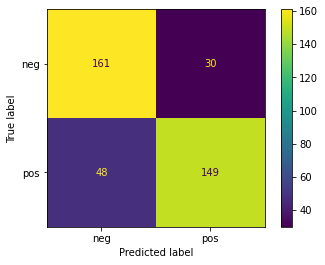

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_tes

## Great job!